# Hepatitis Prediction Project 
- Predict if a patient will live or die based on the parameters using ML

### Workflow
+ Data Prep
+ EDA
+ Feature Selection
+ Build Model
+ Interpret Model
+ Serialization
+ Productionize with Streamlit or Flask

In [155]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sweetviz
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
import re
import os


import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode , iplot , plot
init_notebook_mode(connected = True)
import cufflinks as cf
# cf.go_offline()
from pandas import Series, DataFrame

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report , confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
# print ('default',os.getcwd())

pd.set_option('display.max_rows', 200)

pd.options.mode.chained_assignment = None

In [3]:
path = 'data/hepatitis.data'
df = pd.read_csv(path)
df.head()

,2,30,2.1,1,2.2,2.3,2.4,2.5,1.1,2.6,2.7,2.8,2.9,2.10,1.00,85,18,4.0,?,1.2
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
2,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1


In [4]:
col_names = ["Class",
"AGE",
"SEX",
"STEROID",
"ANTIVIRALS",
"FATIGUE",
"MALAISE",
"ANOREXIA",
"LIVER BIG",
"LIVER FIRM",
"SPLEEN PALPABLE",
"SPIDERS",
"ASCITES",
"VARICES",
"BILIRUBIN",
"ALK PHOSPHATE",
"SGOT",
"ALBUMIN",
"PROTIME",
 "HISTOLOGY"]

In [5]:
df = pd.read_csv(path , names = col_names)
df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [6]:
print('Hepatitis Data - rows:' , df.shape[0],'columns:', df.shape[1])

Hepatitis Data - rows: 155 columns: 20


In [7]:
# checking missing values in df
print("There is {} missing values in the dataframe".format(df.isnull().sum().sum()))

There is 0 missing values in the dataframe


In [ ]:
# Tidying up columns 

In [8]:
df.columns = df.columns.str.lower().str.replace(" ","_")

In [9]:
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [ ]:
# Dealing with placeholders in the data 

In [10]:
df = df.replace("?", 0)

In [11]:
# checking the datatypes of the data
pd.DataFrame([df.dtypes] ,index=['df'] ).T

,df
class,int64
age,int64
sex,int64
steroid,object
antivirals,int64
fatigue,object
malaise,object
anorexia,object
liver_big,object
liver_firm,object


#### Note since the data is all numerical columns , i changed the data types to numerical
+ Also need to take out two columns since they return as float to prevent errors 

In [12]:
# getting columns with object as data type
df.columns[df.dtypes == 'object']

Index(['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices', 'bilirubin',
       'alk_phosphate', 'sgot', 'albumin', 'protime'],
      dtype='object')

In [13]:
# there are 15 of these columns
sum(df.dtypes == 'object')

15

# Out of 15 columns ,two columns return as float in the columns 'albumin','bilirubin' hence i removed them.

+ Changing the data type of all these columns

In [14]:
df[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices',
       'alk_phosphate', 'sgot','protime']] = df[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices',
       'alk_phosphate', 'sgot','protime']].astype(int)

In [15]:
df[['bilirubin','albumin']] = df[['bilirubin','albumin']].astype(float)

# Narrative
+ Most of the data were in objects
+ Two were in float

In [16]:
# checking the data types
df.dtypes

class                int64
age                  int64
sex                  int64
steroid              int64
antivirals           int64
fatigue              int64
malaise              int64
anorexia             int64
liver_big            int64
liver_firm           int64
spleen_palpable      int64
spiders              int64
ascites              int64
varices              int64
bilirubin          float64
alk_phosphate        int64
sgot                 int64
albumin            float64
protime              int64
histology            int64
dtype: object

In [ ]:
### EDA

+ Descriptive Analysis

In [17]:
df.describe()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.496774,1.845161,1.341935,1.593548,1.780645,1.709677,1.470968,1.741935,1.606452,1.806452,1.819355,1.372258,85.619355,83.677419,3.423226,35.116129,1.451613
std,0.406070,12.565878,0.305240,0.514393,0.362923,0.489350,0.505769,0.430508,0.580727,0.627401,0.507588,0.552406,0.471207,0.462503,1.219992,62.061686,89.527688,1.318343,35.221923,0.499266
min,1.000000,7.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,51.000000,30.500000,3.050000,0.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,84.000000,55.000000,3.900000,35.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.500000,119.500000,99.000000,4.200000,65.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


In [ ]:
# Value_counts - checking if data is balanced or imbalanced

In [18]:
df['class'].value_counts()

2    123
1     32
Name: class, dtype: int64

In [19]:
target_Label = {'Die':1 , "Live":2}

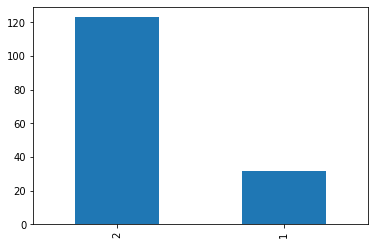

In [20]:
df['class'].value_counts().plot(kind='bar')

In [ ]:
# Observation - data is imbalanced

In [ ]:
# Checking gender of patients

In [21]:
df['sex'].unique()

array([2, 1])

In [156]:
#labels
lab = df["class"].value_counts().keys().tolist()
#values
val = df["class"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'red'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Gender distribution in data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

In [ ]:
# checking age distiribution

In [22]:
df['age'].min()

7

In [23]:
df['age'].max()

78

In [32]:
labels = ["Below 10","10-20","20-30","30-40","40-50","50-60","60-70","70 and more"]
bins= [0,10,20,30,40,50,60,70,80]
freq_df = df.groupby(pd.cut(df['age'],bins=bins,labels=labels)).size()

In [33]:
freq_df

age
Below 10        1
10-20           3
20-30          29
30-40          50
40-50          35
50-60          24
60-70          11
70 and more     2
dtype: int64

In [34]:
freq_df = freq_df.reset_index(name='count')

In [35]:
freq_df

,age,count
0,Below 10,1
1,10-20,3
2,20-30,29
3,30-40,50
4,40-50,35
5,50-60,24
6,60-70,11
7,70 and more,2


In [ ]:
# Observation :
+ we can see that the highest age group are mostly affected are 30-40years old

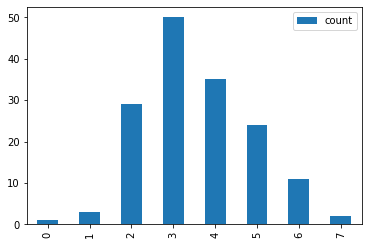

In [30]:
freq_df.plot(kind='bar')

In [ ]:
# Plotting frequency table

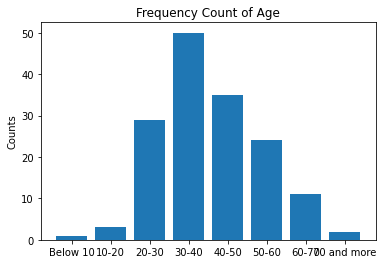

In [36]:
plt.bar(freq_df['age'],freq_df['count'])
plt.ylabel("Counts")
plt.title("Frequency Count of Age")
plt.show()

# Observations :
+ Highest prevalence of Hepatitis is from 30 to 40 years old followed by 50 to 60 years.
+ The least affected age group is under 10 years old.

In [ ]:
# Pie chart 

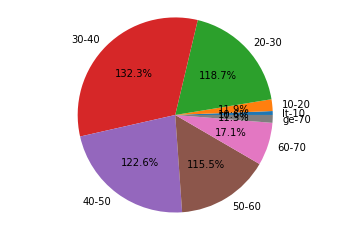

In [37]:
# Pie chart
labels = ['lt-10',"10-20","20-30","30-40","40-50","50-60","60-70","ge-70"]
fig1,ax1 = plt.subplots()
ax1.pie(freq_df['count'],labels=labels,autopct='1%.1f%%')
ax1.axis('equal')
plt.show()

# Checking outliers
+ Univariate Analysis
+ Multivariate Analysis

# Methods
+ Boxplot (Uni)
+ Scatterplot (Multi)
+ Z-score
+ IQR - Interquartile Range

# Using Boxplot for Univariant Outlier detection

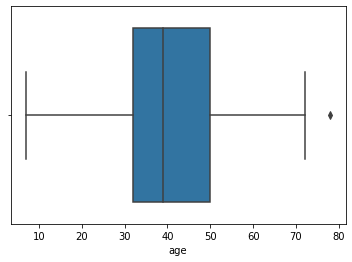

In [39]:
sns.boxplot(df['age'])
plt.show()

In [41]:
df[df.age == 78]

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1


In [ ]:
# we have only one person at 78 years according to the boxplot

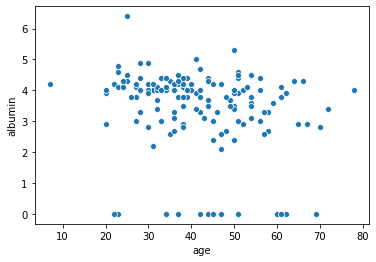

In [43]:
# Scatter plot
sns.scatterplot(df['age'], df['albumin'])
plt.show()

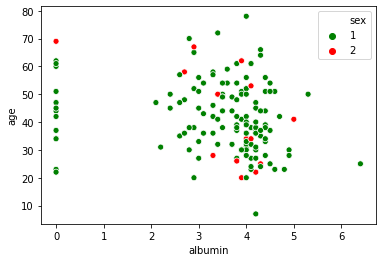

In [44]:
sns.scatterplot(x = df['albumin'] , y=df['age'] , hue=df['sex'] , palette=['green','red'] , data=df)
plt.show()

# Using IQR 
+ H-Spread/Mid_spread
+ Measures the statistical dispersion/spread
+ IQR = Quartile 3 (75% of data) - Quartile1(25% of data)

In [49]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

In [50]:
IQR = q3 - q1

In [51]:
IQR

class               0.00
age                18.00
sex                 0.00
steroid             1.00
antivirals          0.00
fatigue             1.00
malaise             1.00
anorexia            0.00
liver_big           0.00
liver_firm          1.00
spleen_palpable     0.00
spiders             1.00
ascites             0.00
varices             0.00
bilirubin           0.80
alk_phosphate      68.50
sgot               68.50
albumin             1.15
protime            65.00
histology           1.00
dtype: float64

# Observation:
+ We can see that some columns such as age, alk_phosphate, sgot , protime have outliers

In [ ]:
# Checking and plotting to check for outliers

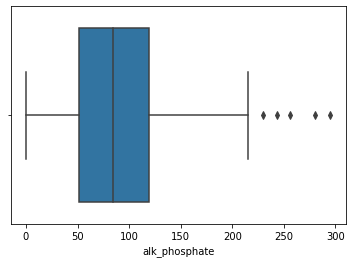

In [42]:
sns.boxplot(df['alk_phosphate'])

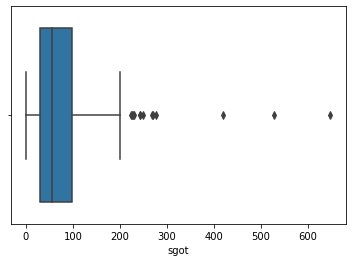

In [52]:
sns.boxplot(df['sgot'])

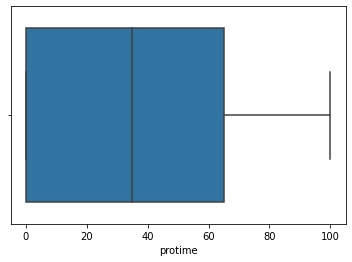

In [53]:
sns.boxplot(df['protime'])

In [ ]:
# Get the actual datapoint that is an outlier

In [57]:
# Multivariant outlier detection 
(df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR))

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Oservation:
+ The data points with true are the outliers

### Solution
+ Remove 
+ Change
+ Ignore

In [60]:
# Removing all outliers in the dataframe
df_no_outliers = df[~((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
# Check results

In [61]:
df_no_outliers

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1
8,2,39,1,2,2,1,2,2,2,1,2,2,2,2,0.7,0,48,4.4,0,1
9,2,30,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,120,3.9,0,1
13,2,30,1,2,2,1,2,2,2,1,2,2,2,2,2.2,57,144,4.9,78,1
16,2,66,1,2,2,1,2,2,2,2,2,2,2,2,1.2,102,53,4.3,0,1
17,2,40,1,1,2,1,2,2,2,1,2,2,2,2,0.6,62,166,4.0,63,1
18,2,38,1,2,2,2,2,2,2,2,2,2,2,2,0.7,53,42,4.1,85,2
22,2,31,1,2,2,2,2,2,2,2,2,2,2,2,1.0,85,20,4.0,100,1
23,2,42,1,2,2,2,2,2,2,2,2,2,2,2,0.9,60,63,4.7,47,1


In [63]:
# Checking the shape of both dataframes and comparing data with outliers and when the are removed
print(df.shape)
print(df_no_outliers.shape)

(155, 20)
(43, 20)


### Plottting the distribution of the data

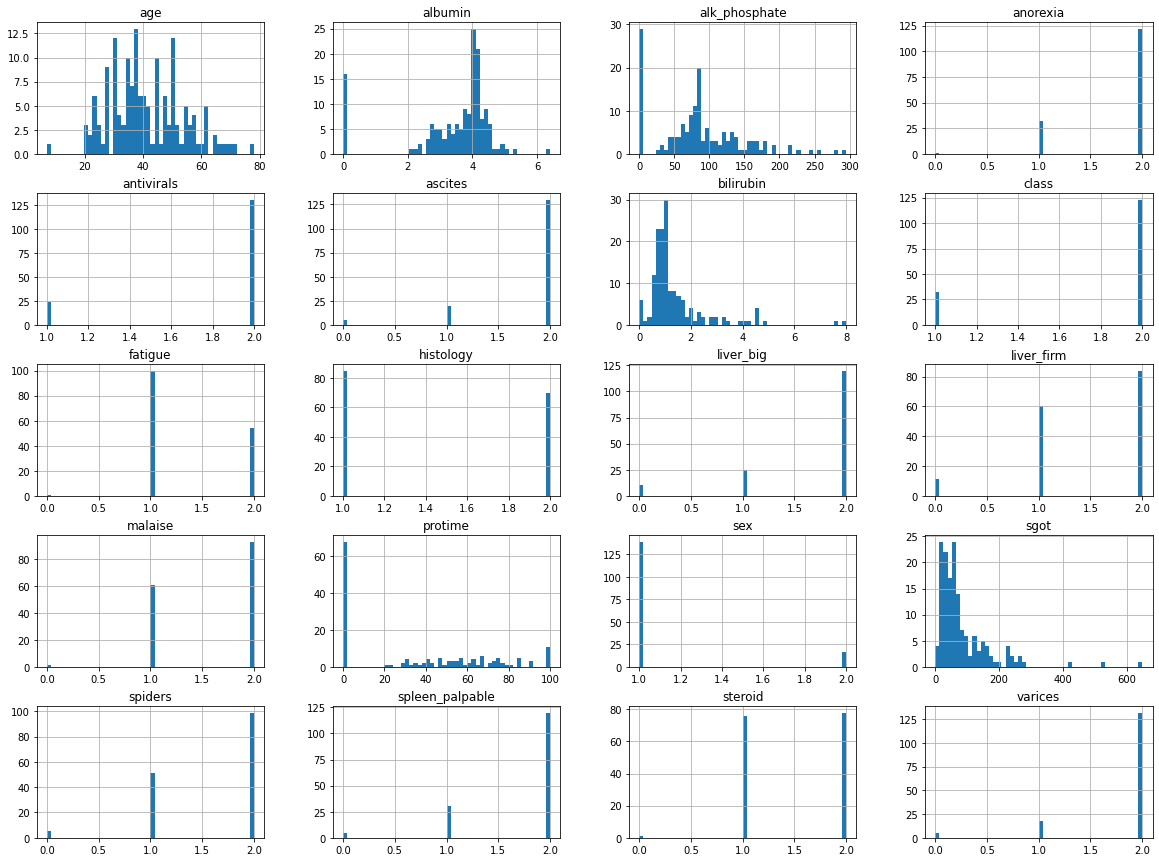

In [64]:
df.hist(bins=50, figsize=(20,15))
plt.show()

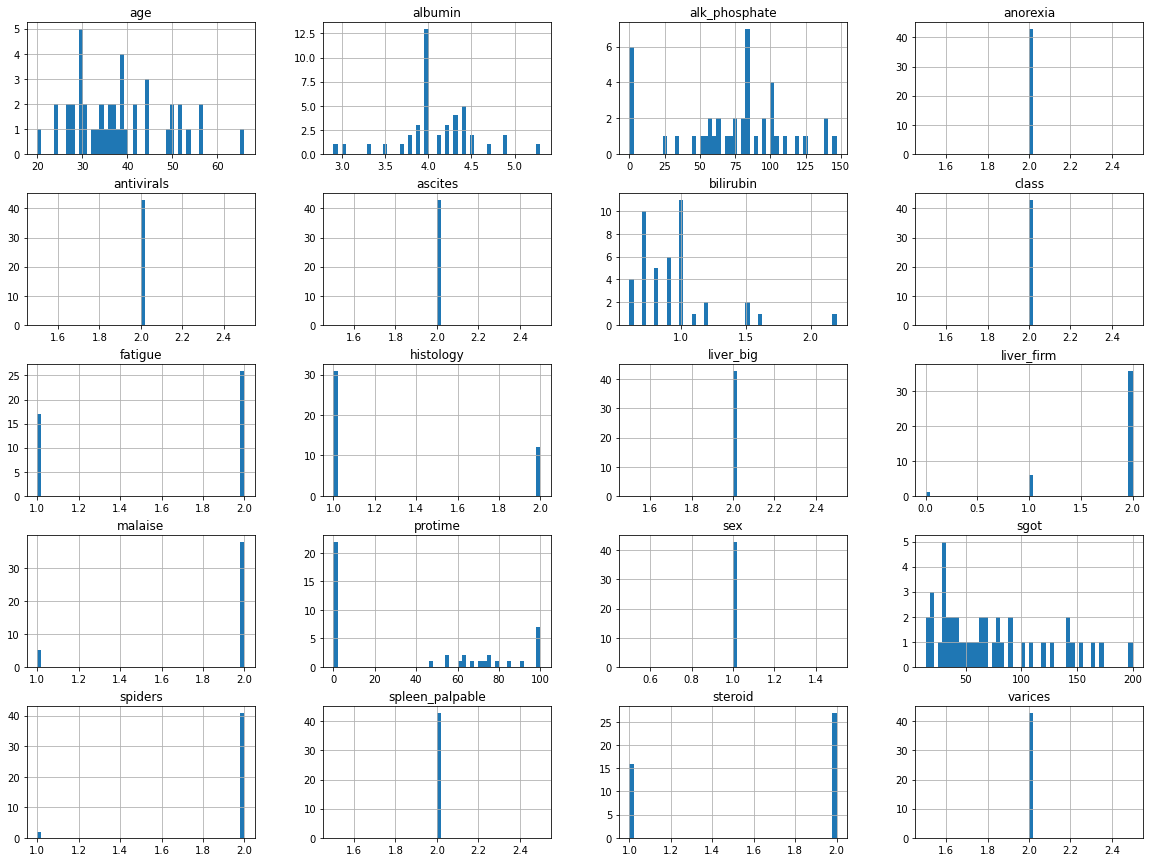

In [66]:
# Data with no outliers
df_no_outliers.hist(bins=50, figsize=(20,15))
plt.show()

### Feature Selection
+ Checking most important features
+ Select KBest
   - Strong relationship with the target
+ Recursive Feature Elimination


In [67]:
from sklearn.feature_selection import SelectKBest , chi2

In [68]:
# features and labels
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1
3,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1


In [69]:
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [70]:
X = df[['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology']]
y = df['class']

# Using KBest
+ I selected the top 10 features , using chi2 for my score fucntion

In [72]:
skb = SelectKBest(score_func=chi2 , k=10)
best_feature_fit = skb.fit(X , y)

In [73]:
print("Scores" , best_feature_fit.scores_)

Scores [ 28.47481919   0.38948319   0.3995129    0.18634161   2.34643234
   2.46803203   0.19648065   0.31698209   0.9867095    0.74535155
   3.18940804   2.09639954   1.12812176  30.10247172  17.88270548
  47.38820795   6.87318606 130.18332457   3.01854675]


In [76]:
# transform - This is optional
best_f = best_feature_fit.transform(X)
best_f

array([[30. ,  2. ,  2. , ...,  4. ,  0. ,  1. ],
       [50. ,  1. ,  2. , ...,  3.5,  0. ,  1. ],
       [78. ,  1. ,  2. , ...,  4. ,  0. ,  1. ],
       ...,
       [61. ,  1. ,  1. , ...,  4.1,  0. ,  2. ],
       [53. ,  1. ,  2. , ...,  4.1, 48. ,  2. ],
       [43. ,  1. ,  2. , ...,  3.1, 42. ,  2. ]])

In [78]:
# Mapping the feature Names
feature_scores = pd.DataFrame(best_feature_fit.scores_ , columns=['Feature_Scores'])

In [79]:
feature_scores

,Feature_Scores
0,28.474819
1,0.389483
2,0.399513
3,0.186342
4,2.346432
5,2.468032
6,0.196481
7,0.316982
8,0.986710
9,0.745352


In [82]:
feature_column_names = pd.DataFrame(X.columns, columns=['feature_names'])
best_feat_df = pd.concat([feature_scores , feature_column_names] , axis=1)

In [83]:
best_feat_df

,Feature_Scores,feature_names
0,28.474819,age
1,0.389483,sex
2,0.399513,steroid
3,0.186342,antivirals
4,2.346432,fatigue
5,2.468032,malaise
6,0.196481,anorexia
7,0.316982,liver_big
8,0.986710,liver_firm
9,0.745352,spleen_palpable


# Getting the best features
+ The higher the number the more important the features
+ Selecting the top 12 top features for Hepatitis 

In [84]:
best_feat_df.nlargest(12, 'Feature_Scores')

,Feature_Scores,feature_names
17,130.183325,protime
15,47.388208,sgot
13,30.102472,bilirubin
0,28.474819,age
14,17.882705,alk_phosphate
16,6.873186,albumin
10,3.189408,spiders
18,3.018547,histology
5,2.468032,malaise
4,2.346432,fatigue


In [ ]:
### Recursive Feature Elimination

In [86]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [87]:
logReg = LogisticRegression()

In [89]:
rfe = RFE(logReg , 8)

In [90]:
rfe_fit = rfe.fit(X,y)

In [ ]:
# Selected features

In [91]:
selected_features = pd.DataFrame(rfe_fit.support_ , columns=['Selected_Features'])
ranking_features = pd.DataFrame(rfe_fit.ranking_, columns=['ranking_Features'])

In [92]:
rfe_feature_df = pd.concat([feature_columns , selected_features , ranking_features],axis=1)

In [93]:
rfe_feature_df

,feature_names,Selected_Features,ranking_Features
0,age,False,8
1,sex,True,1
2,steroid,False,5
3,antivirals,False,9
4,fatigue,True,1
5,malaise,True,1
6,anorexia,True,1
7,liver_big,False,4
8,liver_firm,False,6
9,spleen_palpable,False,7


# Observations :
+ RFE - I will eliminate the lowest ranking or True. Not if its False we cant eliminate. This is due to also industry experience and 
  a bit of google to confirm which of the features are important in the case of Hepatitis

### Checking for feature importance
+ ExtraTreeClassifier
+ Which features are important

In [95]:
from sklearn.ensemble import ExtraTreesClassifier

In [96]:
et_clf = ExtraTreesClassifier()
et_clf.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [99]:
# print Important
print(et_clf.feature_importances_)

[0.0620513  0.01764763 0.02408581 0.01111194 0.03077936 0.05912997
 0.02695125 0.03937908 0.04858644 0.03921377 0.07263322 0.08245004
 0.05638585 0.10452954 0.06501559 0.05188807 0.08445099 0.06631295
 0.05739721]


In [101]:
feature_importance_df = pd.Series(et_clf.feature_importances_ , index=X.columns)

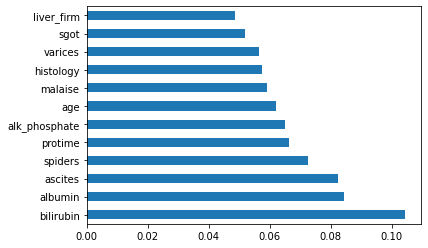

In [103]:
feature_importance_df.nlargest(12).plot(kind='barh')

# Observations:
- All the methods i used gave all the same features to use

In [ ]:
# Correlation

In [104]:
df.corr()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
class,1.000000,-0.219647,0.173051,0.121140,-0.130196,0.292206,0.315970,0.110715,0.102151,0.154736,0.180894,0.330194,0.332796,0.249610,-0.424523,-0.050806,-0.056679,0.296489,0.154688,-0.337856
age,-0.219647,1.000000,0.008126,-0.067710,-0.013100,-0.264635,-0.099516,0.100589,-0.126358,-0.100979,-0.127258,-0.206551,-0.125020,-0.114412,0.095626,0.045328,0.078021,-0.191174,-0.059956,0.170780
sex,0.173051,0.008126,1.000000,-0.039222,-0.089249,-0.063947,-0.020895,0.025186,0.023634,0.015750,-0.078414,-0.065592,0.049516,-0.005045,-0.039341,0.162851,-0.008991,-0.018906,0.067128,-0.137450
steroid,0.121140,-0.067710,-0.039222,1.000000,0.101657,0.146292,0.232041,0.084752,0.159877,0.095280,0.071401,0.029781,-0.002593,-0.029759,-0.005835,-0.042245,-0.021032,0.203109,0.032994,-0.070144
antivirals,-0.130196,-0.013100,-0.089249,0.101657,1.000000,-0.065578,-0.026703,-0.052554,-0.060626,-0.019871,-0.183070,-0.176367,-0.176382,-0.167721,0.177958,0.041764,0.095980,-0.153939,-0.276452,0.209242
fatigue,0.292206,-0.264635,-0.063947,0.146292,-0.065578,1.000000,0.617660,0.419991,0.168796,0.254621,0.226850,0.380935,0.288877,0.217311,-0.243964,-0.110505,-0.175476,0.198983,0.073783,-0.131177
malaise,0.315970,-0.099516,-0.020895,0.232041,-0.026703,0.617660,1.000000,0.631662,0.192556,0.197903,0.145236,0.376666,0.376182,0.267029,-0.269910,-0.114810,-0.177297,0.224605,0.067186,-0.116964
anorexia,0.110715,0.100589,0.025186,0.084752,-0.052554,0.419991,0.631662,1.000000,0.185164,0.144556,0.185004,0.371874,0.301514,0.288883,-0.244095,0.035984,-0.188183,0.133743,0.108322,-0.049702
liver_big,0.102151,-0.126358,0.023634,0.159877,-0.060626,0.168796,0.192556,0.185164,1.000000,0.698517,0.338963,0.370229,0.339108,0.238645,-0.028856,0.018895,-0.026293,0.105555,0.174677,-0.104757
liver_firm,0.154736,-0.100979,0.015750,0.095280,-0.019871,0.254621,0.197903,0.144556,0.698517,1.000000,0.322955,0.407114,0.310338,0.295100,-0.069352,-0.179977,-0.149876,0.059700,0.083312,-0.206632


In [ ]:
# Heatmap for correlation

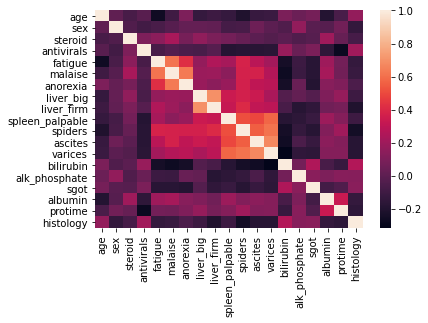

In [105]:
sns.heatmap(X.corr())

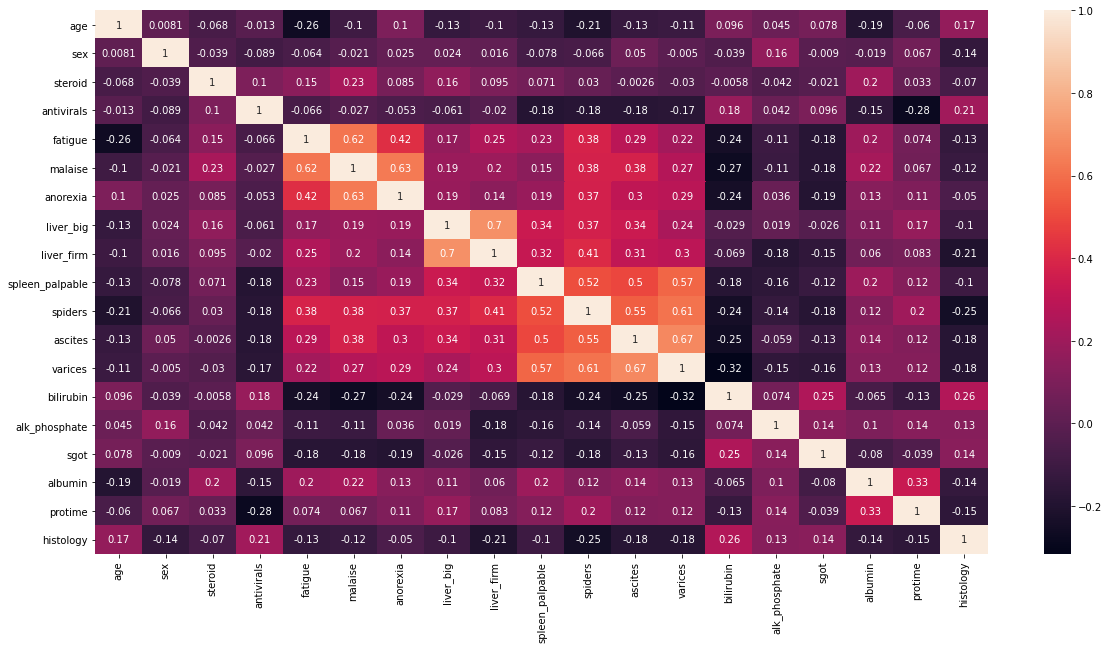

In [106]:
plt.figure(figsize=(20,10))
sns.heatmap(X.corr() , annot=True)
plt.show()

## Model Buiding 
+ Feauture & Target
+ Train/Test/split
+ RandomForest
+ DecisionTrees
+ Serialize

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [108]:
from sklearn.metrics import accuracy_score

In [109]:
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [112]:
X = df.drop('class' , 1)
y = df['class']

In [115]:
# Here i took the top12 features from the SelectBestK
best_feat_df.nlargest(12, 'Feature_Scores')

,Feature_Scores,feature_names
17,130.183325,protime
15,47.388208,sgot
13,30.102472,bilirubin
0,28.474819,age
14,17.882705,alk_phosphate
16,6.873186,albumin
10,3.189408,spiders
18,3.018547,histology
5,2.468032,malaise
4,2.346432,fatigue


In [ ]:
# These are top12 most important features

In [116]:
best_feat_df.nlargest(12,'Feature_Scores')['feature_names'].unique()

array(['protime', 'sgot', 'bilirubin', 'age', 'alk_phosphate', 'albumin',
       'spiders', 'histology', 'malaise', 'fatigue', 'ascites', 'varices'],
      dtype=object)

In [193]:
# So here I am manually adding some of the features that are also important to detect the disease
X_best_features = df[['age','sex','steroid','antivirals','fatigue','spiders','ascites','varices','bilirubin','alk_phosphate','sgot','albumin',
                     'protime', 'histology']]

In [ ]:
# train_test_split

In [194]:
X_train , x_test , y_train , y_test = train_test_split(X,y, test_size=0.30 , random_state=42)

In [ ]:
# train_test_split for the best features

In [195]:
X_train_best , x_test_best , y_train_best , y_test_best = train_test_split(X_best_features ,y, test_size=0.30 , random_state=42)

In [ ]:
# Building Model

In [196]:
logreg = LogisticRegression()
logreg.fit(X_train , y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Model Accuracy
+ Method1

In [197]:
logreg.score(x_test , y_test)

0.8297872340425532

In [198]:
logreg.predict(x_test)

array([2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2])

In [199]:
accuracy_score(y_test , logreg.predict(x_test))

0.8297872340425532

In [ ]:
# Using the best features to build my model

In [200]:
model_logit = LogisticRegression()
model_logit.fit(X_train_best , y_train_best)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [201]:
model_logit.score(x_test_best , y_test_best)

0.8297872340425532

# Observation:
+ The model with all the features had an accuracy of 0.8297872340425532
+ The model with the best feautures also had an accuracy of 0.8297872340425532 
+ Which means the results from using all the features and the best features will ont be different.

# Single Prediction

In [202]:
x_test.iloc[1]

age                51.0
sex                 1.0
steroid             2.0
antivirals          2.0
fatigue             1.0
malaise             2.0
anorexia            2.0
liver_big           2.0
liver_firm          1.0
spleen_palpable     1.0
spiders             1.0
ascites             2.0
varices             1.0
bilirubin           1.0
alk_phosphate       0.0
sgot               20.0
albumin             3.0
protime            63.0
histology           2.0
Name: 142, dtype: float64

In [203]:
result_dic = {"Die":1 , "Live":2}
x1 = x_test.iloc[1]

In [204]:
# reshaping as a single sample
logreg.predict(np.array(x1).reshape(1,-1))

array([1])

# Observation :
+ Based on the parameters the patient will die

# Alternative Algorithms

# Decision Tree

In [205]:
clf = DecisionTreeClassifier()

In [ ]:
# fit the model

In [206]:
clf.fit(X_train_best , y_train_best)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [207]:
# Model Accuracy score
clf.score(x_test_best , y_test_best)

0.7446808510638298

# KNN

In [135]:
from sklearn.neighbors import KNeighborsClassifier

In [208]:
knn = KNeighborsClassifier(n_neighbors=3)

In [209]:
# fit the model
knn.fit(X_train_best , y_train_best)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

# Model Accuracy Score

In [210]:
knn.score(x_test_best , y_test_best)

0.7446808510638298

# Save Model
+ Serialization 
  - Pickle
  - Joblib
  - etc

# Using Joblib to save models

In [141]:
import joblib

In [211]:
# saving logistic regression model
model_file = open("LogisticReg_HepatitisB_model.pkl" , "wb")
joblib.dump(model_logit , model_file)
model_file.close()

In [212]:
# saving KNN model
model_file_knn = open("KNN_HepatitisB_model.pkl", "wb")
joblib.dump(knn , model_file_knn)
model_file_knn.close()

In [213]:
# saving the Decision Tree Model
model_file_clf = open("decision_tree_clf_HepatitisB_model.pkl" , "wb")
joblib.dump(clf , model_file_clf)
model_file_clf.close()

# Create Decision Tree Plot

In [145]:
from IPython.display import Image
from sklearn import tree
import pydotplus

In [214]:
feature_names_best = X_best_features.columns

In [215]:
target_names = ['Die','Live']

In [ ]:
# Create a Dot plot

In [216]:
dot_data = tree.export_graphviz(clf , out_file=None , feature_names = feature_names_best , class_names = target_names)

In [ ]:
# Draw a graph

In [217]:
graph = pydotplus.graph_from_dot_data(dot_data)

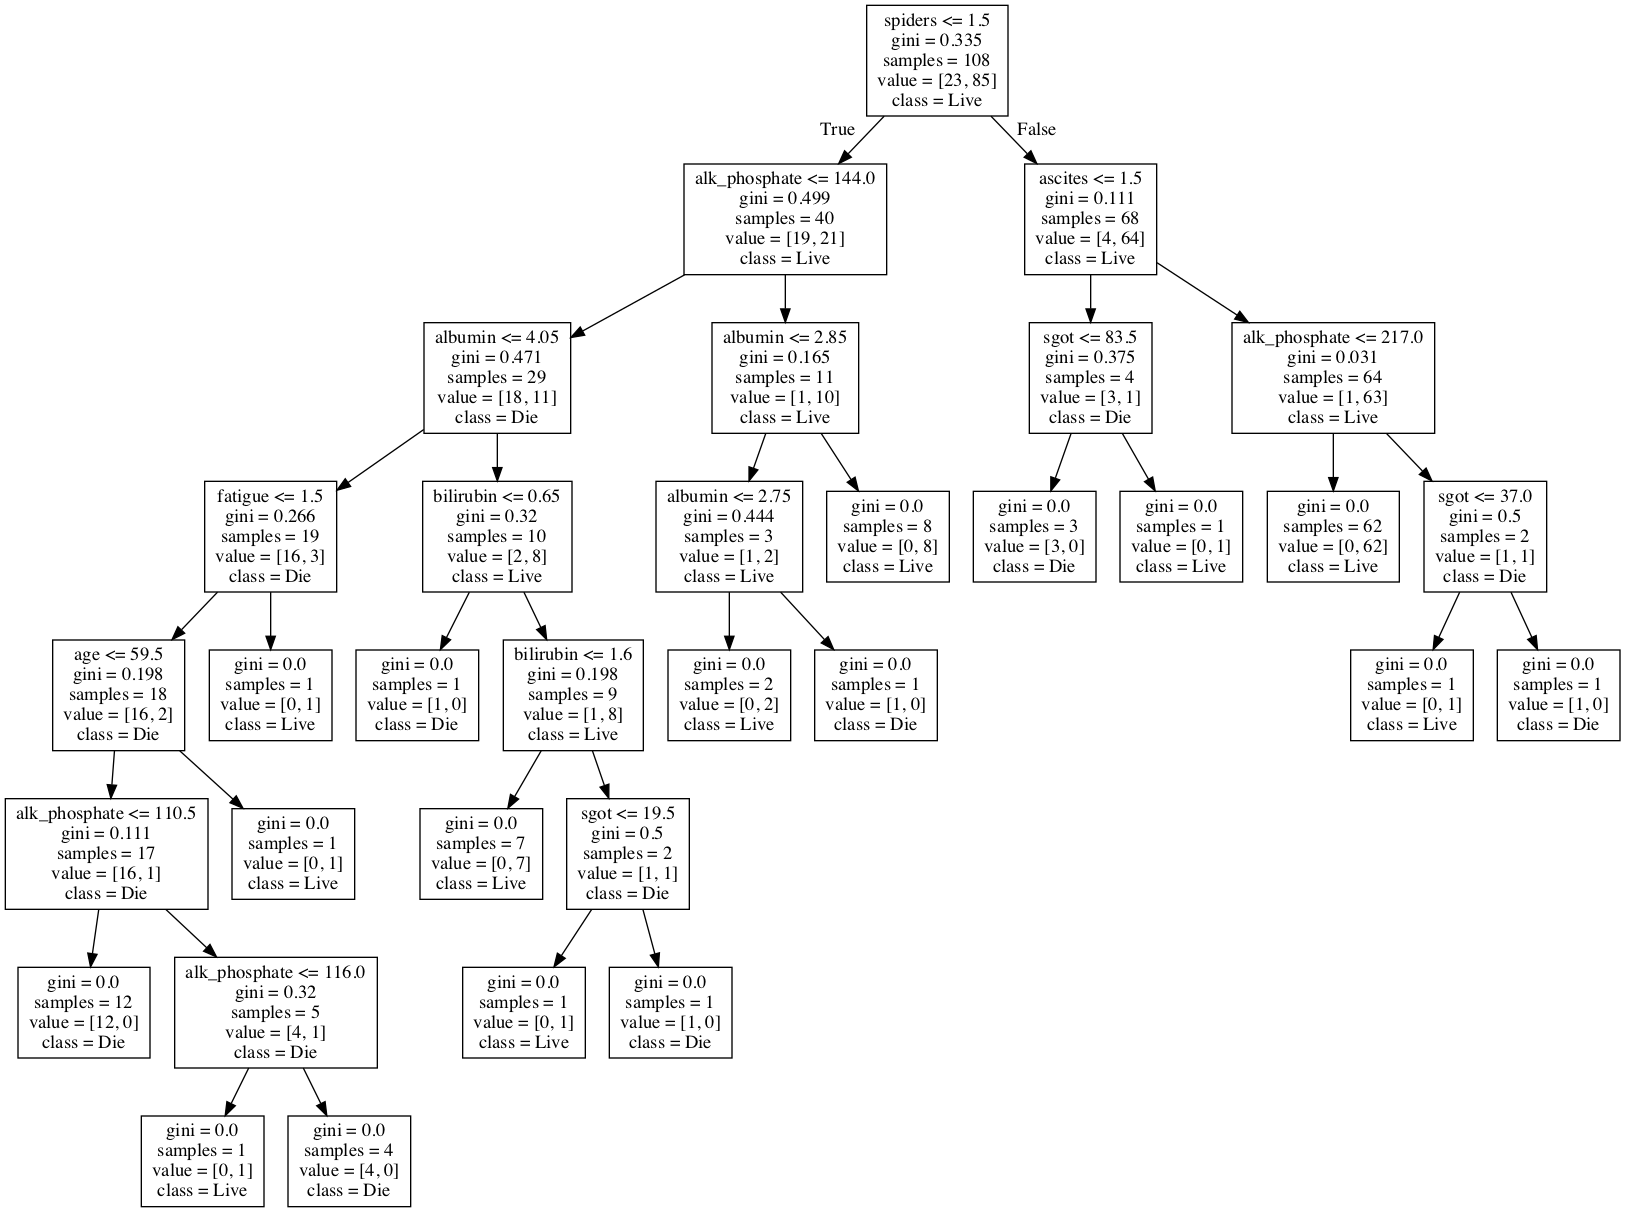

In [218]:
Image(graph.create_png())

# Save the plot

In [219]:
graph.write_png("hep_decision_tree_plot.png")

True

# Model Interpreting
+ Eli5
+ Lime
+ SHAP
+ Skater

In [158]:
# Interpreting with Lime
import lime
import lime.lime_tabular

In [ ]:
# Method and Attributes

In [220]:
dir(lime)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'discretize',
 'exceptions',
 'explanation',
 'lime_base',
 'lime_tabular']

# create lime explainer
+ LimeTabularExplainer = Tables
+ LimeTextExplainer = Text
+ LimeImageExplainer = Images

In [221]:
feature_names_best

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology'],
      dtype='object')

In [162]:
target_names

['Die', 'Live']

In [222]:
class_names = ['Die(1)',"Live(2)"]

In [223]:
# Create Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_best.values , feature_names = feature_names_best,
                                                  class_names=class_names,discretize_continuous=True)

In [ ]:
# Pulling out the patient details

In [224]:
x1

age                51.0
sex                 1.0
steroid             2.0
antivirals          2.0
fatigue             1.0
malaise             2.0
anorexia            2.0
liver_big           2.0
liver_firm          1.0
spleen_palpable     1.0
spiders             1.0
ascites             2.0
varices             1.0
bilirubin           1.0
alk_phosphate       0.0
sgot               20.0
albumin             3.0
protime            63.0
histology           2.0
Name: 142, dtype: float64

In [225]:
x_test_best.iloc[1]

age              51.0
sex               1.0
steroid           2.0
antivirals        2.0
fatigue           1.0
spiders           1.0
ascites           2.0
varices           1.0
bilirubin         1.0
alk_phosphate     0.0
sgot             20.0
albumin           3.0
protime          63.0
histology         2.0
Name: 142, dtype: float64

In [ ]:
# # making singular prediction

In [226]:
model_logit.predict(np.array(x_test_best.iloc[1]).reshape(1,-1))

array([1])

In [ ]:
# Using Lime to predict why patient will die

In [227]:
exp = explainer.explain_instance(x_test_best.iloc[1], model_logit.predict_proba, num_features=14, top_labels=1)

In [228]:
exp.show_in_notebook(show_table=True, show_all=False)

In [229]:
# Explaination as a list
exp.as_list()

KeyError: 1

In [177]:
import eli5

Using TensorFlow backend.


In [ ]:
# Show contribution of each feature

In [230]:
eli5.show_weights(model_logit , top=10)

In [231]:
feature_names_best2 = ['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology']

In [232]:
eli5.show_weights(model_logit,feature_names=feature_names_best2,target_names=class_names)

Weight?,Feature
+1.127,spiders
+0.921,sex
+0.563,fatigue
+0.477,albumin
+0.264,ascites
+0.180,steroid
+0.009,sgot
+0.002,alk_phosphate
-0.009,protime
-0.015,age


In [233]:
eli5.show_prediction(model_logit,x_test_best.iloc[1],feature_names=feature_names_best2,target_names=class_names)

### Evaluation of Model
+ Confusion Matrix
+ Classification Report
+ Accuracy score

In [ ]:
# image.png

In [235]:
from sklearn.metrics import confusion_matrix

In [236]:
y_pred = model_logit.predict(x_test_best)

In [237]:
# Accuracy score
accuracy_score(y_test, y_pred)

0.8297872340425532

In [238]:
# Using Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[ 3,  6],
       [ 2, 36]])

In [239]:
# plotting confusion matrix
from sklearn.metrics import plot_confusion_matrix

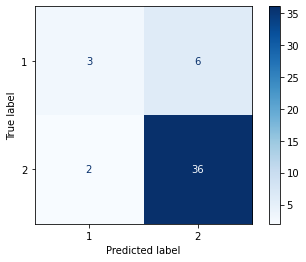

In [242]:
plot_confusion_matrix(model_logit, x_test_best , y_test_best , cmap="Blues")

# Normalizing the confusion matrix

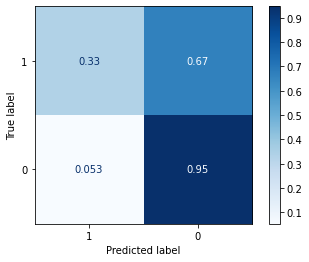

In [254]:
plot_confusion_matrix(model_logit, x_test_best , y_test_best ,normalize='true' ,cmap="Blues" , display_labels= [1,0])

In [260]:
tp,tf,fn,tn = confusion_matrix(y_test,y_pred).ravel()

In [261]:
tp

3

In [262]:
### Printing classification report
from sklearn.metrics import classification_report

In [265]:
print(classification_report(y_test,y_pred , target_names=class_names))

              precision    recall  f1-score   support

      Die(1)       0.60      0.33      0.43         9
     Live(2)       0.86      0.95      0.90        38

    accuracy                           0.83        47
   macro avg       0.73      0.64      0.66        47
weighted avg       0.81      0.83      0.81        47



In [ ]:
## Pandas_ml
from pandas_ml import ConfusionMatrix
cm = ConfusionMatrix(y_test , y_pred)
cm.print_stats()

cm.plot(normalized=True)
plt.show()